In [1]:
import numpy as np
import lmfit
from water_quality.helper import resampling
from water_quality.model import model
from water_quality.atmosphere import downwelling_irradiance
from water_quality.surface import surface
from matplotlib import pyplot as plt

In [2]:
wavelengths = np.array([402.380005, 407.380005, 412.390015, 417.399994, 422.410004,
                        427.410004, 432.420013, 437.429993, 442.440002, 447.440002,
                        452.450012, 457.459991, 462.470001, 467.470001, 472.480011,
                        477.48999 , 482.5     , 487.5     , 492.51001 , 497.519989,
                        502.529999, 507.529999, 512.539978, 517.549988, 522.559998,
                        527.559998, 532.570007, 537.580017, 542.590027, 547.590027,
                        552.599976, 557.609985, 562.619995, 567.619995, 572.630005,
                        577.640015, 582.650024, 587.650024, 592.659973, 597.669983,
                        602.679993, 607.679993, 612.690002, 617.700012, 622.710022,
                        627.710022, 632.719971, 637.72998 , 642.73999 , 647.73999 ,
                        652.75    , 657.76001 , 662.77002 , 667.77002 , 672.780029,
                        677.789978, 682.799988, 687.799988, 692.809998, 697.820007,
                        702.830017, 707.830017, 712.840027, 717.849976, 722.859985,
                        727.859985, 732.869995, 737.880005, 742.890015, 747.890015,
                        752.900024, 757.909973, 762.919983, 767.919983, 772.929993,
                        777.940002, 782.950012, 787.950012, 792.960022, 797.969971,
                        802.97998 , 807.97998 , 812.98999 , 818.      , 823.01001 ,
                        828.01001 , 833.02002 , 838.030029, 843.039978, 848.039978,
                        853.049988, 858.059998])

r_rs = np.array([0.00603791, 0.00981128, 0.01150319, 0.01340571, 0.01537638,
                 0.01809819, 0.0192675 , 0.01852876, 0.02033659, 0.02119888,
                 0.02161874, 0.02265431, 0.02458068, 0.02424845, 0.02517403,
                 0.02499796, 0.02654414, 0.02765259, 0.02731589, 0.02805674,
                 0.02801236, 0.02720888, 0.02781419, 0.02898689, 0.0290271 ,
                 0.02912343, 0.03037548, 0.0298175 , 0.02983626, 0.02979335,
                 0.0297343 , 0.02942758, 0.02898452, 0.02829514, 0.02640027,
                 0.02555054, 0.02437805, 0.02273278, 0.02072901, 0.01821161,
                 0.01699281, 0.01577473, 0.01547564, 0.0155904 , 0.01461827,
                 0.01384649, 0.01399479, 0.01382354, 0.01339125, 0.0131657 ,
                 0.0127545 , 0.0119072 , 0.01159197, 0.01134474, 0.01167088,
                 0.01149925, 0.01095655, 0.01015861, 0.00967889, 0.00927609,
                 0.00909777, 0.00885301, 0.0081119 , 0.00753782, 0.00733986,
                 0.00721639, 0.00716607, 0.00757163, 0.00771839, 0.0079903 ,
                 0.007867  , 0.00732743, 0.00787968, 0.00791539, 0.00788188,
                 0.00782509, 0.0080038 , 0.00760701, 0.00770207, 0.00779431,
                 0.00752666, 0.00775784, 0.00671312, 0.00738831, 0.00798632,
                 0.00750788, 0.00699975, 0.00733688, 0.00740688, 0.00740361,
                 0.00733911, 0.00766789])

weights = np.ones(len(r_rs))

In [3]:
# Resample spectral libraries to sensor's band setting
a_i_spec_res = resampling.resample_a_i_spec(wavelengths)
a_w_res = resampling.resample_a_w(wavelengths)
b_phy_norm_res = resampling.resample_b_phy_norm(wavelengths)
b_bw_res = resampling.resample_b_bw(wavelengths)
R_i_b_res = resampling.resample_R_i_b(wavelengths)
E_0_res = resampling.resample_E_0(wavelengths)
a_oz_res = resampling.resample_a_oz(wavelengths)
a_ox_res = resampling.resample_a_ox(wavelengths)
a_wv_res = resampling.resample_a_wv(wavelengths)
da_W_div_dT_res = resampling.resample_da_W_div_dT(wavelengths)

# Precompute E_d components
E_d_res = downwelling_irradiance.E_d(wavelengths)
E_dd_res = downwelling_irradiance.E_dd(wavelengths)
E_dsa_res = downwelling_irradiance.E_dsa(wavelengths)
E_dsr_res = downwelling_irradiance.E_dsr(wavelengths)

In [4]:
params = lmfit.Parameters()
params.add('C_0', value=0, min=0, max=100, vary=True)
params.add('C_1', value=0, min=0, max=100, vary=False)
params.add('C_2', value=0, min=0, max=100, vary=False)
params.add('C_3', value=0, min=0, max=100, vary=False)
params.add('C_4', value=0, min=0, max=100, vary=False)
params.add('C_5', value=0, min=0, max=100, vary=False)
params.add('C_Y', value=0, min=0, max=4, vary=True)
params.add('C_X', value=0, min=0.0, max=100, vary=True)
params.add('C_Mie', value=0, min=0.0, max=100, vary=True)
params.add('f_0', value=0, min=0, max=1, vary=True)
params.add('f_1', value=0, min=0, max=1, vary=True)
params.add('f_2', value=0, min=0, max=1, vary=True)
params.add('f_3', value=0, min=0, max=1, vary=True)
params.add('f_4', value=0, min=0, max=1, vary=True)
params.add('f_5', value=0, min=0, max=1, vary=True)
params.add('B_0', value=1/np.pi, vary=False)
params.add('B_1', value=1/np.pi, vary=False)
params.add('B_2', value=1/np.pi, vary=False)
params.add('B_3', value=1/np.pi, vary=False)
params.add('B_4', value=1/np.pi, vary=False)
params.add('B_5', value=1/np.pi, vary=False)
params.add('b_bphy_spec', value=0.0010, vary=False)
params.add('b_bMie_spec', value=0.0042, vary=False)
params.add('b_bX_spec', value=0.0086, min=0, max=1, vary=False)
params.add('b_bX_norm_factor', value=1, vary=False)
params.add('a_NAP_spec_lambda_0', value=0.041, min=0.01, max=0.12, vary=False) 
params.add('S', value=0.014, min=0.007, max=0.026, vary=True) #0.014
params.add('K', value=0, min=0, vary=False) #0.014
params.add('S_NAP', value=0.011, vary=False)
params.add('n', value=-1, min=-1, max=0, vary=False)
params.add('lambda_0', value=440, vary=False)
params.add('lambda_S', value=500, vary=False)
params.add('theta_sun', value=np.radians(30), min=np.radians(0), max=np.radians(90), vary=False)
params.add('theta_view', value=np.radians(40), min=np.radians(0), max=np.radians(90), vary=False)
params.add('n1', value=1, vary=False)
params.add('n2', value=1.33, vary=False)
params.add('kappa_0', value=1.0546, vary=False)
params.add('fresh', value=False, vary=False)
params.add('zB', value=10, min=0, max=100, vary=True)
params.add('T_W', value=25, min=0, max=40, vary=False)
params.add('T_W_0', value=20, vary=False)
params.add('error_method', value=2, vary=False)
params.add('P', value=1013.25, vary=False) 
params.add('AM', value=1, vary=False) 
params.add('RH', value=60, vary=False) 
params.add('H_oz', value=0.38, vary=False)
params.add('WV', value=2.5, vary=False) 
params.add('alpha', value=1.317, vary=False) 
params.add('beta', value=0.2606, vary=False) 
params.add('g_dd', value=0.02, min=-1, max=10, vary=True) 
params.add('g_dsr', value=1/np.pi, min=0, max=10, vary=True) 
params.add('g_dsa', value=1/np.pi, min=0, max=10, vary=True) 
params.add('f_dd', value=1, vary=False) 
params.add('f_ds', value=1, vary=False) 
params.add('rho_L', value=0.02006, vary=False) 
params.add('offset', value=0, min=-0.1, max=0.1, vary=False)
params.add('fit_surface', value=True, vary=False)

In [6]:
inv = model.invert(params, 
                   R_rs=r_rs, 
                   wavelengths=wavelengths,
                   weights=weights,
                   a_i_spec_res=a_i_spec_res,
                   a_w_res=a_w_res,
                   b_phy_norm_res=b_phy_norm_res,
                   b_bw_res=b_bw_res,
                   R_i_b_res=R_i_b_res,
                   E_0_res = E_0_res,
                   a_oz_res = a_oz_res,
                   a_ox_res = a_ox_res,
                   a_wv_res = a_wv_res,
                   da_W_div_dT_res = da_W_div_dT_res,
                   E_dd_res = E_dd_res,
                   E_dsa_res = E_dsa_res,
                   E_dsr_res = E_dsr_res,
                   E_d_res = E_d_res,
                   method="least_squares", 
                   max_nfev=400)

In [7]:
inv.params

name,value,initial value,min,max,vary
C_0,2.3118e-17,0,0.00000000,100.000000,True
C_1,0.00000000,0,0.00000000,100.000000,False
C_2,0.00000000,0,0.00000000,100.000000,False
C_3,0.00000000,0,0.00000000,100.000000,False
C_4,0.00000000,0,0.00000000,100.000000,False
C_5,0.00000000,0,0.00000000,100.000000,False
C_Y,0.02462796,0,0.00000000,4.00000000,True
C_X,4.62790003,0,0.00000000,100.000000,True
C_Mie,3.8866e-18,0,0.00000000,100.000000,True
f_0,0.70893050,0,0.00000000,1.00000000,True


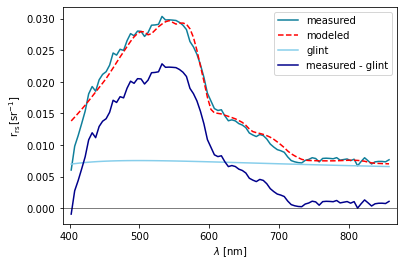

In [8]:
R_rs_surf = surface.R_rs_surf(wavelengths = wavelengths, 
                              g_dd = inv.params['g_dd'].value,
                              g_dsr = inv.params['g_dsr'].value,
                              g_dsa = inv.params['g_dsa'].value,
                              E_d_res = E_d_res)

plt.plot(wavelengths, r_rs, c='#0f7f9b', label="measured")
plt.plot(wavelengths, model.forward(inv.params, wavelengths=wavelengths, E_d_res=E_d_res), '--', c='red', label='modeled')
plt.plot(wavelengths, R_rs_surf, c='skyblue', label="glint")
plt.plot(wavelengths, r_rs - R_rs_surf, c='darkblue', label="measured - glint")
plt.xlabel('$\lambda$ [nm]')
plt.ylabel('$\mathrm{r_{rs}} \/ [\mathrm{sr}^{-1}]$')
plt.hlines(0,300,1000, color='black', linewidth=0.5) #, linestyle='dotted')
plt.xlim(390,870)
plt.legend()
plt.show()